In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
# Specify the path to your CSV file
standard_data_path= '/content/drive/My Drive/Semester 7/machine learning/lab_1/train.csv'
csv_path_of_test_data='/content/drive/My Drive/Semester 7/machine learning/lab_1/valid.csv'
# Read the CSV file using pandas
standard_data = pd.read_csv(standard_data_path)
test_data=pd.read_csv(csv_path_of_test_data)
# Display the first few rows of the DataFrame
standard_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641,45,NaN,1,6
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490,45,NaN,1,6
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203,45,NaN,1,6
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964,45,NaN,1,6
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606,45,NaN,1,6


In [ ]:
standard_data.shape
standard_data.drop(columns=["label_1","label_3","label_4"],axis=1,inplace=True)
test_data.drop(columns=["label_1","label_3","label_4"],axis=1,inplace=True)


In [ ]:
# preprocessing data because there are some NaN values\
columns_with_missing = standard_data.columns[standard_data.isna().any()].tolist()
cleaned_standard_data = standard_data.dropna(subset=columns_with_missing)

columns_with_missing = test_data.columns[test_data.isna().any()].tolist()
test_data = test_data.dropna(subset=columns_with_missing)



In [ ]:
x_train=cleaned_standard_data.iloc[:,:256]
y_train=cleaned_standard_data.iloc[:,256:257]

x_test=test_data.iloc[:,:256]
y_test=test_data.iloc[:,256:257]
print(x_test.shape,y_test.shape)

(750, 256) (750, 1)


In [ ]:

import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE

from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the xg-boost
xgb_r = xg.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

# Train the model
xgb_r.fit(x_train, y_train)

# Make predictions on the test set
y_pred = xgb_r.predict(x_test)
y_pred_before=y_pred
mse = MSE(y_test, y_pred)
print("Mean Squared Error:", mse)

            label_2
count  28040.000000
mean      27.975107
std        5.735913
min       22.000000
25%       25.000000
50%       27.000000
75%       30.000000
max       61.000000


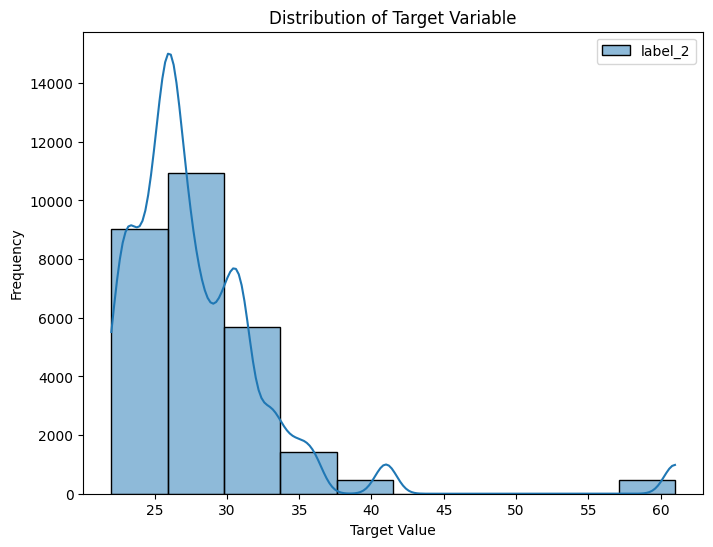

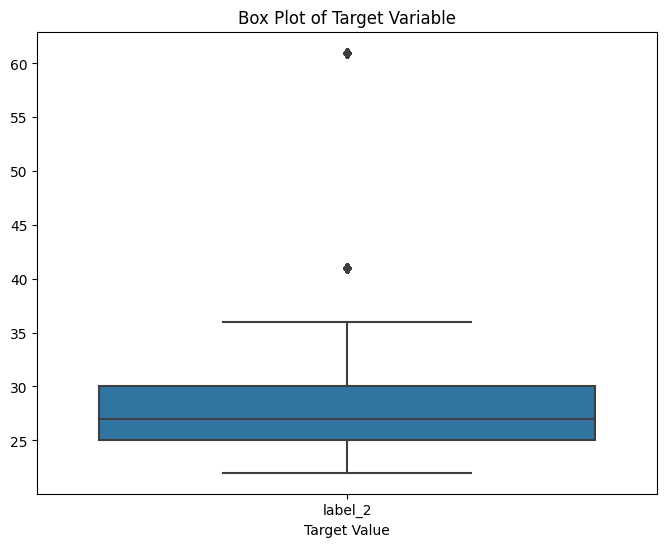

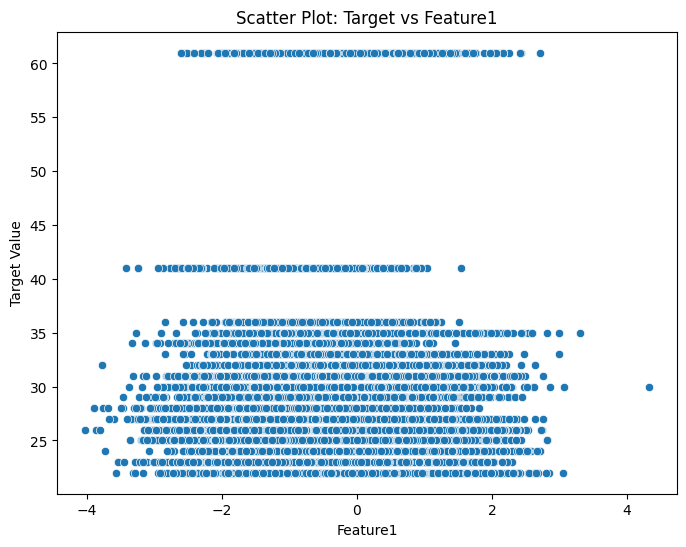

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print(y_train.describe())

# Distribution plot
plt.figure(figsize=(8, 6))
sns.histplot(y_train, bins=10, kde=True)
plt.title("Distribution of Target Variable")
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.show()

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y_train)
plt.title("Box Plot of Target Variable")
plt.xlabel("Target Value")
plt.show()

# Scatter plot (if applicable, to visualize relationships with other features)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_train['feature_1'], y=y_train['label_2'])
plt.title("Scatter Plot: Target vs Feature1")
plt.xlabel("Feature1")
plt.ylabel("Target Value")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x_train)
#  convert X_scaled back to a pandas DataFrame
x_train_scaled_df = pd.DataFrame(x_scaled, columns=x_train.columns)
x_train_scaled_df=x_train

scaler=StandardScaler()
x_test_scaled=scaler.fit_transform(x_test)
#  convert X_scaled back to a pandas DataFrame
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_train.columns)
x_test_scaled_df=x_test

xgboost for scaled data set

In [ ]:

import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import hamming_loss, jaccard_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the xg-boost
xgb_r = xg.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

# Train the model
xgb_r.fit(x_train_scaled_df, y_train)

# Make predictions on the test set
y_pred = xgb_r.predict(x_test_scaled_df)
mse = MSE(y_test, y_pred)
print("Mean Squared Error:", mse)


In [ ]:
correlated_features = set()
correlation_matrix =x_train_scaled_df.corr()
x_train_scaled_df.corr()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256
feature_1,1.000000,-0.121676,-0.037029,0.145633,0.079656,0.149253,0.028379,-0.147790,0.051300,0.173989,...,-0.107266,-0.057796,-0.056604,-0.133512,0.076297,-0.296220,-0.127254,0.214652,-0.028065,-0.046658
feature_2,-0.121676,1.000000,-0.317193,-0.039848,-0.066403,0.019331,0.001379,-0.066685,-0.179495,-0.230508,...,0.013921,-0.001273,0.161511,0.054138,-0.098701,0.149414,0.228009,0.141309,0.186994,-0.144739
feature_3,-0.037029,-0.317193,1.000000,0.001755,-0.022552,-0.045518,0.109086,0.003902,0.124212,0.046895,...,0.026443,-0.025192,-0.192398,0.128054,0.044539,-0.029690,-0.095992,-0.041498,-0.190645,0.047295
feature_4,0.145633,-0.039848,0.001755,1.000000,0.183209,0.336084,-0.037661,-0.093481,0.130821,-0.083225,...,0.075019,0.006955,-0.228030,-0.232197,0.261620,-0.261910,0.031806,0.352850,-0.042392,-0.321713
feature_5,0.079656,-0.066403,-0.022552,0.183209,1.000000,0.172993,-0.274253,-0.092687,0.101470,0.087783,...,-0.159834,-0.095047,-0.212634,0.167175,0.127240,0.043438,0.004587,0.370426,0.250544,0.073181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature_252,-0.296220,0.149414,-0.029690,-0.261910,0.043438,0.086015,-0.107675,0.110474,0.024234,-0.136515,...,-0.291848,-0.056714,-0.051778,0.176697,-0.200359,1.000000,0.205670,-0.131737,0.174581,0.399231
feature_253,-0.127254,0.228009,-0.095992,0.031806,0.004587,0.108519,0.167474,0.174965,-0.216099,-0.213166,...,-0.287145,-0.190999,0.013847,0.095830,0.156135,0.205670,1.000000,0.171848,0.032355,-0.145467
feature_254,0.214652,0.141309,-0.041498,0.352850,0.370426,0.245495,-0.192366,0.000739,0.102503,0.090141,...,-0.354642,-0.141885,-0.180937,-0.257647,0.311595,-0.131737,0.171848,1.000000,-0.010880,-0.260254
feature_255,-0.028065,0.186994,-0.190645,-0.042392,0.250544,0.153158,-0.213353,0.020824,-0.090577,-0.105515,...,-0.009141,0.040390,0.109166,0.149750,-0.308867,0.174581,0.032355,-0.010880,1.000000,0.180143


In [ ]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.6:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [ ]:
len(correlated_features)

7

In [ ]:
print(correlated_features)

{'feature_208', 'feature_113', 'feature_98', 'feature_244', 'feature_102', 'feature_233', 'feature_87'}


In [ ]:
# x_train_scaled_df.drop(columns=correlated_features, axis=1, inplace=True)
# x_test_scaled_df.drop(columns=correlated_features, axis=1, inplace=True)

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import hamming_loss, jaccard_score

# # Initialize the xg-boost
# xgb_r = xg.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

# # Train the model
# xgb_r.fit(x_train_scaled_df, y_train)

# # Make predictions on the test set
# y_pred = xgb_r.predict(x_test_scaled_df)
# mse = MSE(y_test, y_pred)
# print("Mean Squared Error:", mse)


In [ ]:
from sklearn.decomposition import PCA

pca=PCA(.97, svd_solver='full')
pca=pca.fit(x_train_scaled_df)
x_train_pca=pca.transform(x_train_scaled_df)
x_test_pca=pca.transform(x_test_scaled_df)
print(x_test_pca.shape)

(750, 79)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import hamming_loss, jaccard_score,r2_score

import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE


# Initialize the xg-boost
xgb_r = xg.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

# Train the model
xgb_r.fit(x_train_pca, y_train)

# Make predictions on the test set
y_pred = xgb_r.predict(x_test_pca)
y_pred_after=y_pred
mse = MSE(y_test, y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Squared Error:", mse)
print('r2 score: ',r2)


In [ ]:
pca_columns = [f'New_feature_{i+1}' for i in range(x_train_pca.shape[1])]
df_final_Label1 = pd.DataFrame(x_test_pca, columns=pca_columns)
df_final_Label1.insert(0, 'Label_1_predictions_before', y_pred_before)
df_final_Label1.insert(1, 'Label_1_predictions_after',y_pred_after)
df_final_Label1.insert(2,'No of new features', [pca.n_components_ for i in range(len(y_pred_before))])
df_final_Label1.to_csv('190088H_Label_2.csv')

In [ ]:
# !pip install shap
# import xgboost
# import shap
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier()

# model.fit(x_train_scaled_df, y_train)



# explainer = shap.TreeExplainer(model)
# shap_values = explainer.shap_values(x_train_scaled_df)
# shap_feature_importance = abs(shap_values).mean(axis=0)
# important_features = x_train_scaled_df.columns[shap_feature_importance > 0.9]